# Data Analysis of 45 Ice Cream Stores for 2010-2012

One of the Ice Cream Vendor stored the weekly sale records of their 45 stores around the country for three consecutive years. All the stores are divided in 5 different regions of country with different Temerature and Unemployment count. Good analysis of this data can allow the management to make decisions that can help the company maximize profits as well as avoid losses by observing trends in the historical data collected from sales in each store. This data contains various indicators that can be used to determine the performance of the stores by comparing various parameters. This data shows patterns and trends that can be followed across the years to discover various patterns. However, looking at this data with the naked eye is tedious and impossible task. This is even more difficult considering that the data is split into various files, each with only a part of the information required. Therefore, an analysis tool is needed to merge the files and generate various summaries that would make it easy to analyze the data. The store therefore decided to implement an analysis system that would collect data from the ordering system, merge in into a useful format and do various analysis.

### Below we have done Exploratory Data Analysis and applied Machine Learning libraries in Python. First step is to import libraries and modules using inbuilt import() function. The libraries and their descriptions are as below: 

Pandas: High performance Data Analysis and Data Structure tool in python

NumPy: Library with high-level mathematical functions, powerful array object and matrices

Matplotlib: Library for plotting objects, pyplot module of this library provide MATLAB like interface

Scikit Learn: Machine learning library with every kind of ML algorithms for classification, clustering and regression.

In [1]:
import pandas as pd           # adding pandas library as variable pd
import matplotlib.pyplot as plt                      # adding pyplot from matplotlib as variable plt
import numpy as np                  # import of numpy library
import sklearn.linear_model as linear                  # import of linear model from sklearn library
from sklearn import metrics as mt                       # import of metrics from sklearn

### Read the data and merge data from different files to one DataFrame object

Three files containing data related to Regions of Stores, Temperature & Unemployment Count of Stores and Weekly Sales of Stores is available in comma seperated file formats respectively. Read these files using read_csv() function of Pandas library and to merge them over a common attribute, i.e. Store ID, using merge function of the same library.

In [2]:
region=pd.read_csv('Region.csv')            # read the csv file with data for Regions using pandas
store_details=pd.read_csv('StoreDetails.csv')            # read the csv file with data for Stores using pandas
weekly_sales=pd.read_csv('Weekly_Sales.csv')            # read the csv file with data for Sales using pandas
data=pd.merge(region,store_details)            # merge the data of regions and stores using pandas. This is an innerjoin
data=pd.merge(data,weekly_sales)            # merge the data of earlier merged data and sales using pandas.

## DateTime Formatting for Time Series Analysis

Convert the Date Series of the Data Frame to DataTime Format from string. Later copy that series and save that as a numpy array. Assign integer number corresponding to each Region Name. Add that numpy array to Data Frame as a DataFrame Series.

In [3]:
data['Date']=pd.to_datetime(data['Date'])             # conversion of Date column to datetime format from string
digits=np.array(data['Region'].tolist())               # creation of a numpy array With each region name

for i in range(len(digits)):                         # loop to convert the character elements of numpy array to corresponding integer number
    if(digits[i]=='A'):
        digits[i]=1
    elif(digits[i]=='B'):
        digits[i]=2
    elif(digits[i]=='C'):
        digits[i]=3
    elif(digits[i]=='D'):
        digits[i]=4
    elif(digits[i]=='E'):
        digits[i]=5   
data['Region_number']=digits                # Addition of column to dataframe with the numbers against each region

## Re-Indexing of DataFrame

Replace the current index of DataFrame with the Date Series, that we converted to DateTime Format earlier and remove the series from the DataFrame to resist duplicacy of any series.

In [4]:
data.index=data['Date']
del data.index.name
del data['Date']

In [5]:
data.head()

,Store,Region,Temperature,Unemployment,Weekly_Sales,Region_number
2010-05-02,1,A,42.31,8.106,24924.50,1
2010-12-02,1,A,38.51,8.106,46039.49,1
2010-02-19,1,A,39.93,8.106,41595.55,1
2010-02-26,1,A,46.63,8.106,19403.54,1
2010-05-03,1,A,46.50,8.106,21827.90,1


## Data Manipulation

Manipulation of data using different functions of pandas DataFrame Object.

##### DataFrame.index - 
This object represents the index of a pandas DataFrame as a series. The default type of this in our case is DateTimeIndex as we have already reindexed our DataFrame from a numbered series to DateTime series. 
type(data.index) >> pandas.core.indexes.datetimes.DatetimeIndex

##### DataFrame.index.year - 
As we know that the index in our dataframe is a datetime series. Thus, we can extract date, month and year from it. DateTime.year is used to do same and the type of this series is >> pandas.core.indexes.numeric.Int64Index

##### DataFrame.groupby() - 
A method to group a pandas DataFrame. It takes Column Name as argument and group dataset or subset to the values of that column. Few other methods are also associated with this method such as sum(), mean(), min() etc. This association of methods to aggregate the numeric values also takes a column name as argument in squared brackets [].

In [6]:
store_1_2010=data[(data.index.year==2010)&(data['Store']==1)]   #Sales data of Store 1 in year 2010
store_1_2011=data[((data.index.year==2011))&(data['Store']==1)]   #Sales data of Store 1 in year 2011
store_1_2012=data[((data.index.year==2012))&(data['Store']==1)]   #Sales data of Store 1 in year 2012
store_1=data[data['Store']==1]                                 # store 1
store_wise=data.groupby('Store')['Weekly_Sales'].sum()     #overall sale record for stores
store_wise_2010=data[(data.index.year==2010)].groupby('Store')['Weekly_Sales'].sum()
store_wise_2011=data[(data.index.year==2011)].groupby('Store')['Weekly_Sales'].sum()
store_wise_2012=data[(data.index.year==2012)].groupby('Store')['Weekly_Sales'].sum()
yearly_sale=data.groupby(data.index.year)['Weekly_Sales'].sum()    # Yearly grouped sale data
region_sale=data.groupby('Region')['Weekly_Sales'].sum()           # sale data grouped on the basis of region
temperature_detail=data.groupby('Store')['Temperature'].max()       # Maximumm temperature grouped by Store
temp_in_2010=data[data.index.year==2010].groupby('Store')['Temperature'].max()     # maximum temperature of stores in 2010
temp_in_2011=data[data.index.year==2011].groupby('Store')['Temperature'].max()     # maximum temperature of stores in 2011
temp_in_2012=data[data.index.year==2012].groupby('Store')['Temperature'].max()     # maximum temperature of stores in 2012

### Store wise total sales for three years

As we have already done data manipulation in the above code, thus we need not to extract the information from the data, this is what we already have but only in the form same as our data tables. Below is an example of how we can just use our visualization skills to represent that information with the help of graphs. Graphs and Images are the best means to simplify and demonstrate the trends and pattern shown by the data. In the below diagram the aggregated total sale of all 45 stores is drawn using functions of matplotlib library of Python.

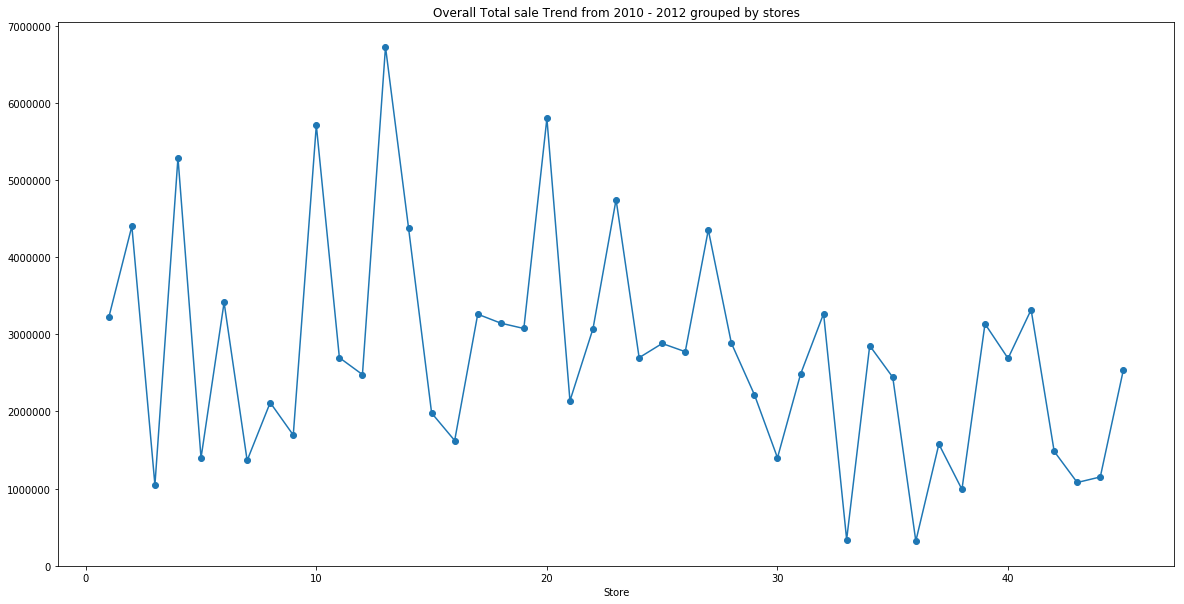

In [7]:
plt.figure(figsize=(20,10))
store_wise.plot(marker="o")          # graph for store wise
plt.title('Overall Total sale Trend from 2010 - 2012 grouped by stores')
plt.show()

### Store wise mean of the sale for three years
Below is the figure depicting the mean values of all the stores for these three years as a line graph. Here, you can see that we have manipulated the data and grouped it by stores where we have applied mean function on Weekly_Sales column

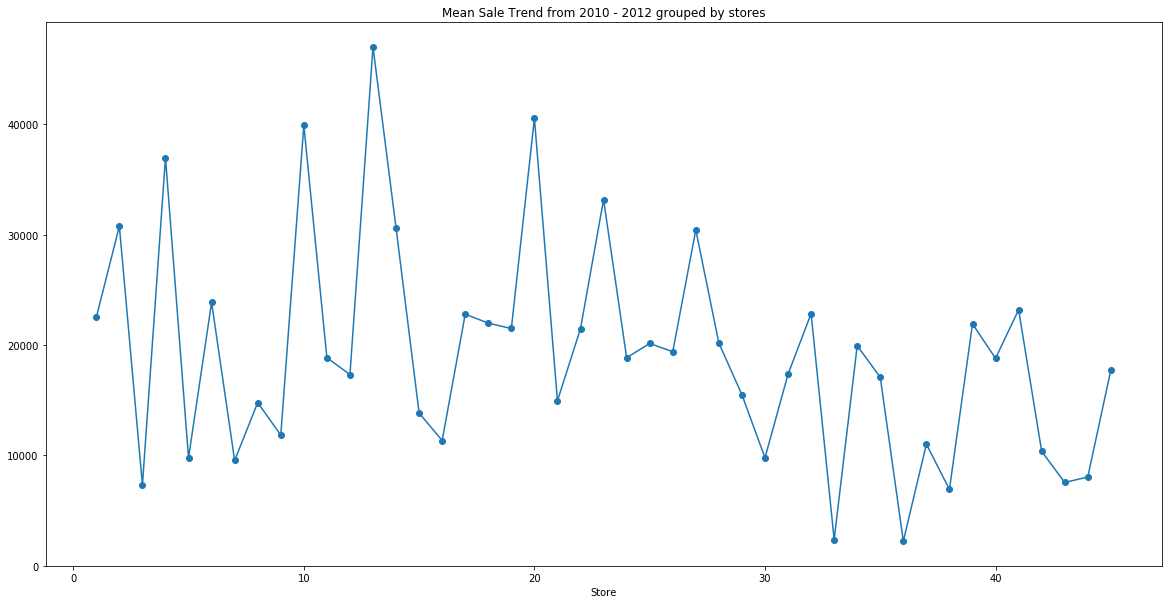

In [8]:
plt.figure(figsize=(20,10))
(data.groupby('Store')['Weekly_Sales'].mean()).plot(marker="o")
plt.title('Mean Sale Trend from 2010 - 2012 grouped by stores')
plt.show()

If you may compare the trends in above two diagrams then you will find that whether we draw total sale for all stores or we draw mean sale for all three years collectively, the deviation is almost same in both figures. The only difference is in the actual values because one is average of sale whereas other is sum of sales for all the three years.

In [9]:
print("Maximum Mean Sale of three years",(data.groupby('Store')['Weekly_Sales'].mean()).max())
print("Maximum total sale of three years",store_wise.max())

Maximum Mean Sale of three years 47020.45545454549
Maximum total sale of three years 6723925.130000005


### Store wise sales for year 2010
Below is the sale of each store aggregated in total for the year 2010

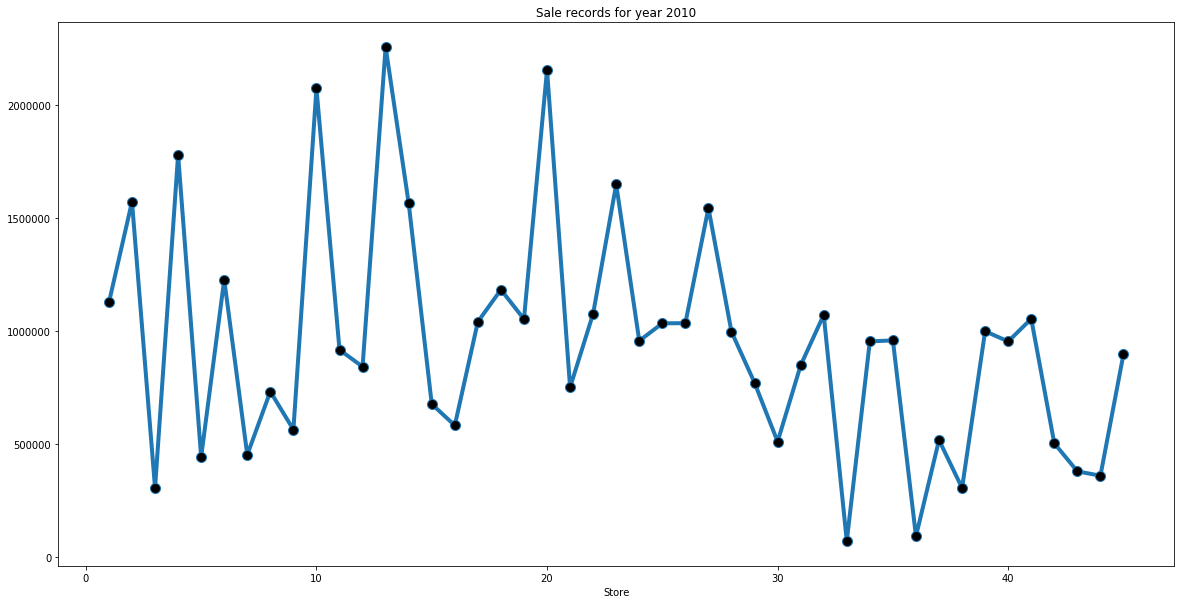

In [10]:
plt.figure(figsize=(20,10))
store_wise_2010.plot(style='-', marker='o', markerfacecolor='black',markersize=10,linewidth=4)
plt.title('Sale records for year 2010')
plt.show()

### Store wise sales for year 2011
Below is the aggregated total sale of stores in year 2011

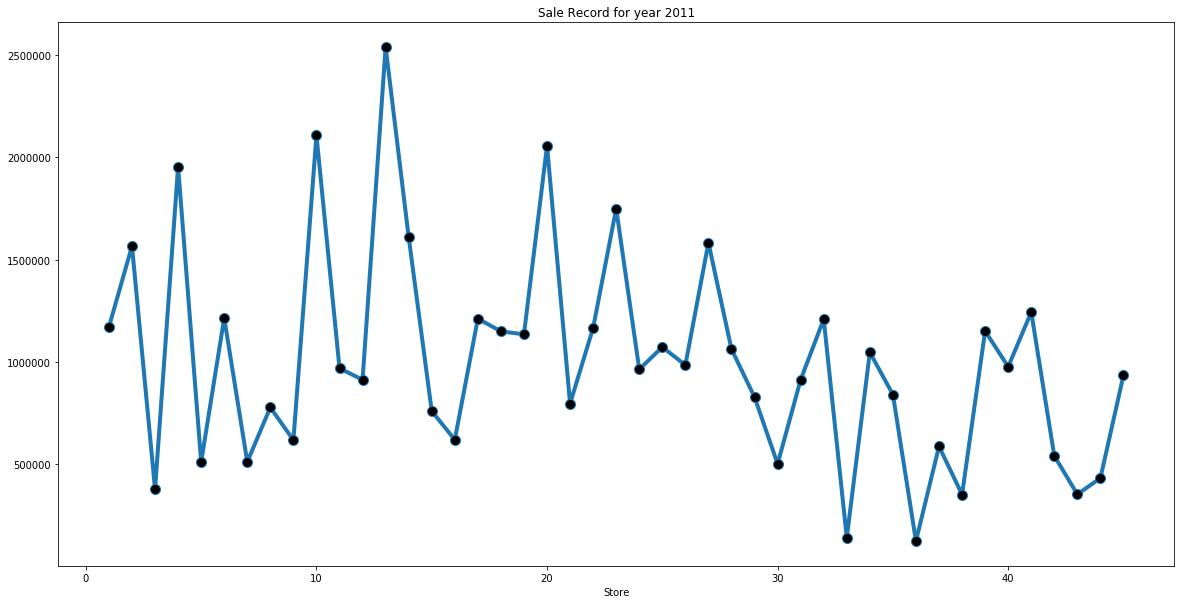

In [11]:
plt.figure(figsize=(20,10))
store_wise_2011.plot(style='-', marker='o', markerfacecolor='black',markersize=10,linewidth=4)   ## plot of sale in 2011
plt.title('Sale Record for year 2011')
plt.show()

### Comparison of Store wise sales for three years

Below is the comparison of aggregated total sale of all the stores in corresponding three years. Each line is for each year and is indexed in the upper right corner of the figure. 

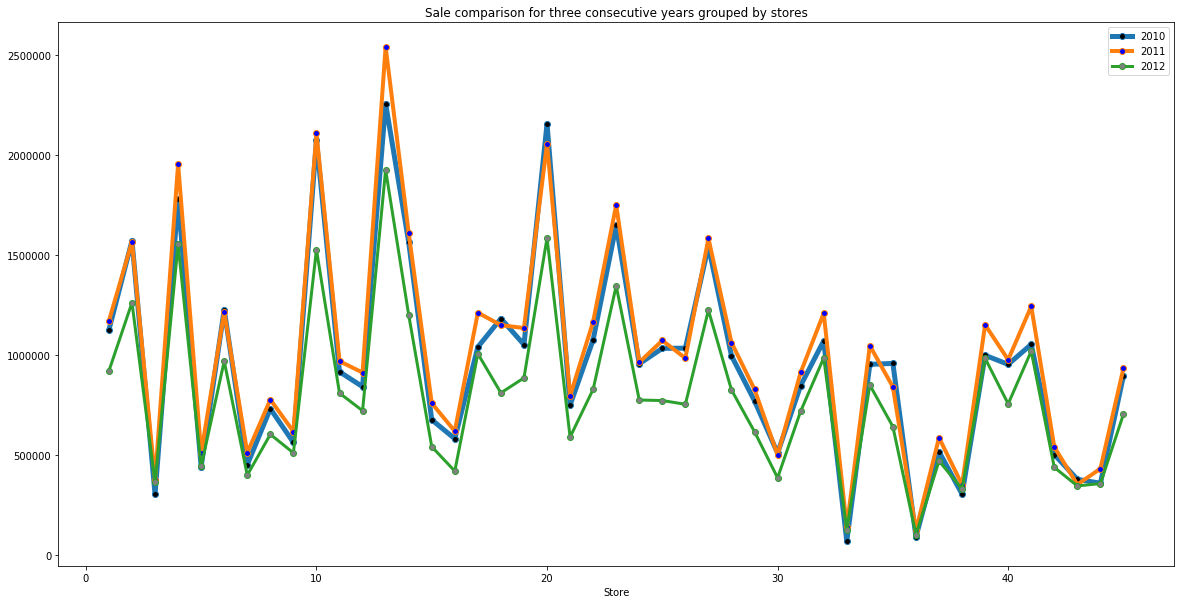

In [12]:
plt.figure(figsize=(20,10))
store_wise_2010.plot(label='2010',style='-', marker='o', markerfacecolor='black',linewidth=5)
store_wise_2011.plot(label='2011',style='-', marker='o', markerfacecolor='blue',linewidth=4)
store_wise_2012.plot(label='2012',style='-', marker='o', markerfacecolor='grey',linewidth=3)
plt.legend()
plt.title('Sale comparison for three consecutive years grouped by stores')
plt.show()          # Comparison of three consecutive years for stores

### Average of data based on Year, month and Week
Below are three resampling examples applied on data of Store ID - 1 . In each one we passed a parameter to resample function. 'Y' stands for Year, 'M' stands for Month and 'W' stands for Week in below scenario. Mean of Temperature, Unemployment and Sale is measured based on yearly, monthly and weekly data.

In [13]:
store_1.resample('Y').mean()

,Store,Temperature,Unemployment,Weekly_Sales
2010-12-31,1,67.497500,7.860729,23465.598542
2011-12-31,1,67.658269,7.817231,22529.823077
2012-12-31,1,69.994419,7.080907,21430.363953


In [14]:
print(store_1.resample('M').mean())

            Store  Temperature  Unemployment  Weekly_Sales
2010-01-31      1    71.890000      7.838000  20094.190000
2010-02-28      1    57.435000      7.951750  33647.665000
2010-03-31      1    59.127500      7.959250  21781.297500
2010-04-30      1    69.815000      7.808000  16963.877500
2010-05-31      1    63.201667      7.912333  21711.915000
2010-06-30      1    85.203333      7.801000  16684.466667
2010-07-31      1    80.225000      7.792250  16326.762500
2010-08-31      1    80.700000      7.799750  17614.607500
2010-09-30      1    77.347500      7.792250  24531.605000
2010-10-31      1    66.340000      7.827800  28170.940000
2010-11-30      1    65.453333      7.828000  18336.916667
2010-12-31      1    51.085000      7.927333  34433.490000
2011-01-31      1    53.598000      7.774000  17784.788000
2011-02-28      1    64.250000      7.828000  26695.115000
2011-03-31      1    71.910000      7.722000  19216.493333
2011-04-30      1    62.186667      7.732667  33777.4166

In [15]:
print(store_1.resample('W').mean())

            Store  Temperature  Unemployment  Weekly_Sales
2010-01-10    1.0        71.89        7.8380     20094.190
2010-01-17    NaN          NaN           NaN           NaN
2010-01-24    NaN          NaN           NaN           NaN
2010-01-31    NaN          NaN           NaN           NaN
2010-02-07    1.0        71.59        7.7975     36795.785
2010-02-14    NaN          NaN           NaN           NaN
2010-02-21    1.0        39.93        8.1060     41595.550
2010-02-28    1.0        46.63        8.1060     19403.540
2010-03-07    NaN          NaN           NaN           NaN
2010-03-14    1.0        65.24        7.8125     19379.670
2010-03-21    1.0        54.58        8.1060     22136.640
2010-03-28    1.0        51.45        8.1060     26229.210
2010-04-04    NaN          NaN           NaN           NaN
2010-04-11    1.0        80.69        7.8080     17558.090
2010-04-18    1.0        66.32        7.8080     17596.960
2010-04-25    1.0        64.84        7.8080     16145.3

In [16]:
(store_1.resample('W').mean()).dropna()

,Store,Temperature,Unemployment,Weekly_Sales
2010-01-10,1.0,71.890,7.8380,20094.190
2010-02-07,1.0,71.590,7.7975,36795.785
2010-02-21,1.0,39.930,8.1060,41595.550
2010-02-28,1.0,46.630,8.1060,19403.540
2010-03-14,1.0,65.240,7.8125,19379.670
2010-03-21,1.0,54.580,8.1060,22136.640
2010-03-28,1.0,51.450,8.1060,26229.210
2010-04-11,1.0,80.690,7.8080,17558.090
2010-04-18,1.0,66.320,7.8080,17596.960
2010-04-25,1.0,64.840,7.8080,16145.350


Here in weekly sales data NaN stands for Null values which means that for these dates we do not any data in Store 1. In the next resampling, we have eliminated the Null values from the data using dropna() function.

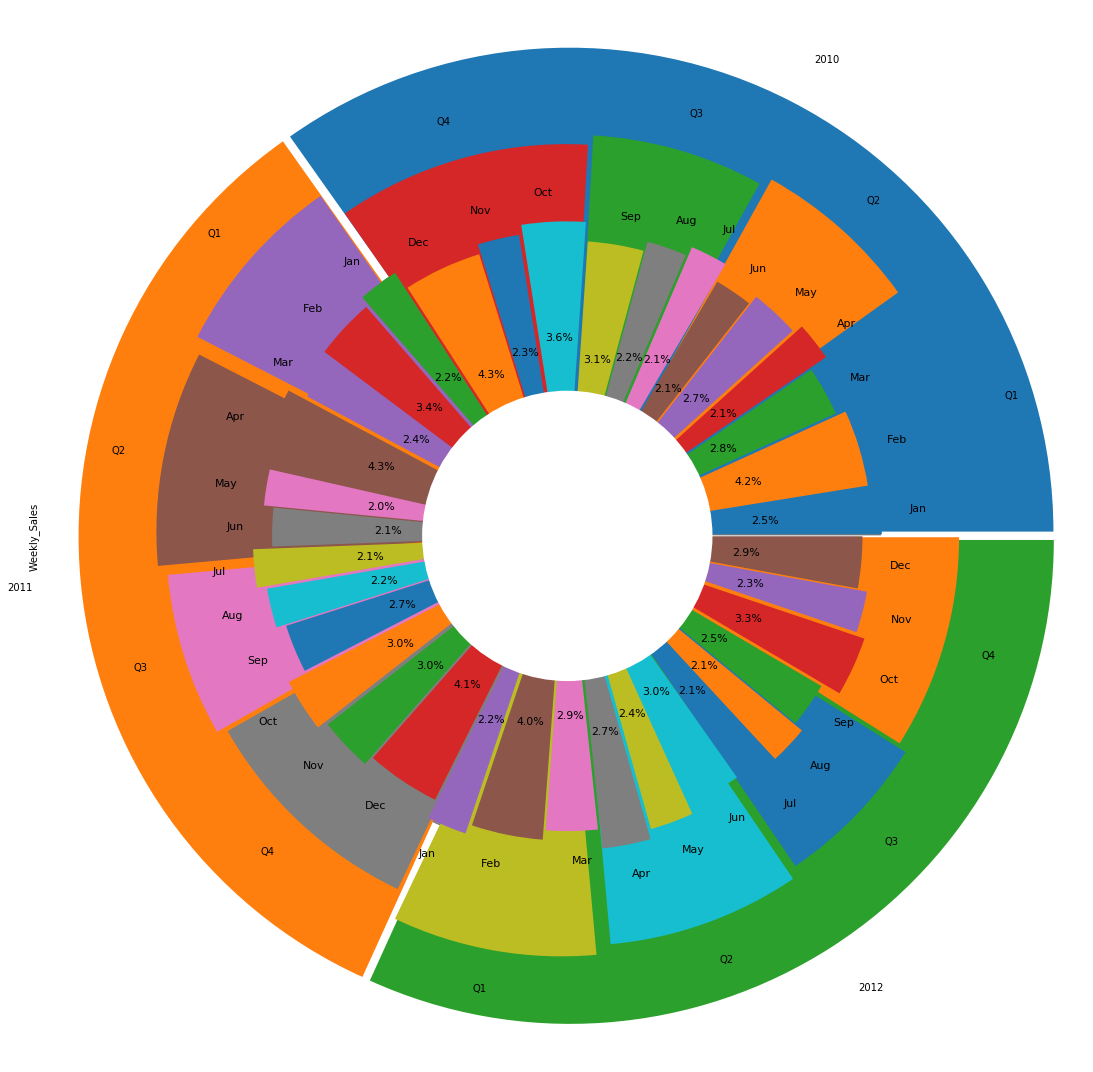

In [17]:
explode_year=([0.1]*3)
explode_qtr=([0.7,0.5,0.3,0.1]*3)
explode_month=([0.5,0.3,0.1]*12)
M_labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(15,15))
(store_1.resample('Y').mean())['Weekly_Sales'].plot.pie(radius=10,explode=explode_year,shadow=False, labels =([2010,2011,2012]))
(store_1.resample('Q').mean())['Weekly_Sales'].plot.pie(radius=8,explode=explode_qtr,shadow=False, labels =(["Q1","Q2","Q3","Q4"]*3))
(store_1.resample('M').mean())['Weekly_Sales'].plot.pie(autopct='%1.1f%%', radius=6,explode=explode_month, shadow=True, labels =(M_labels*3), fontsize=11)
centre_circle = plt.Circle((0,0),3.0,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [18]:
data[data.index.year==2010].shape

(2160, 6)

### Comparison of Sales based on Temperature in Region A

In the below diagram, there is a scatter plot plotted based on Weekly Sales vs Temperature for Region A.

<Figure size 1440x720 with 0 Axes>

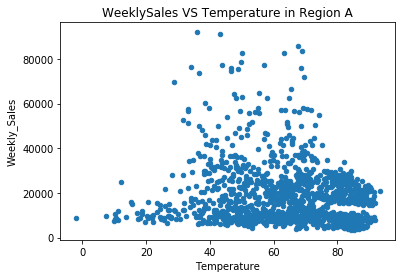

In [19]:
plt.figure(figsize=(20,10))
data[data['Region']=='A'].plot.scatter(x='Temperature',y='Weekly_Sales')
plt.title('WeeklySales VS Temperature in Region A')
plt.show()            # scatter plot for Temperature vs Weekly Sales

In the above diagram we can see that with the rise in Temperature, there is rise in Weekly Sales. When the temperature is below 30, then the sales are comparitively low in Region. From 30 to 75, there are few exceptions where weekly sales have increased from 40000 (fourty thousand). During the temrerature around 40 to 90, the maximum density is around 10000, which means that the sales remain arount ten thousand the most, but we also have nice strength of sale in region 20000 - 30000 for the temperature in between 60 to 90.

### Comparison of Sales based on Unemployment in Region A

In the below diagram, there is a scatter plot plotted based on Weekly Sales vs Unemployment for Region A.

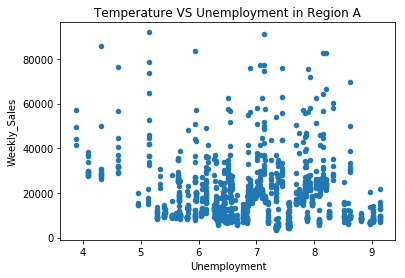

In [20]:
data[data['Region']=='A'].plot.scatter(x='Unemployment',y='Weekly_Sales')
plt.title('Temperature VS Unemployment in Region A')
plt.show()                                # scatter plot for Weekly_Sales vs Unemployment

### Yearly Report of Sales

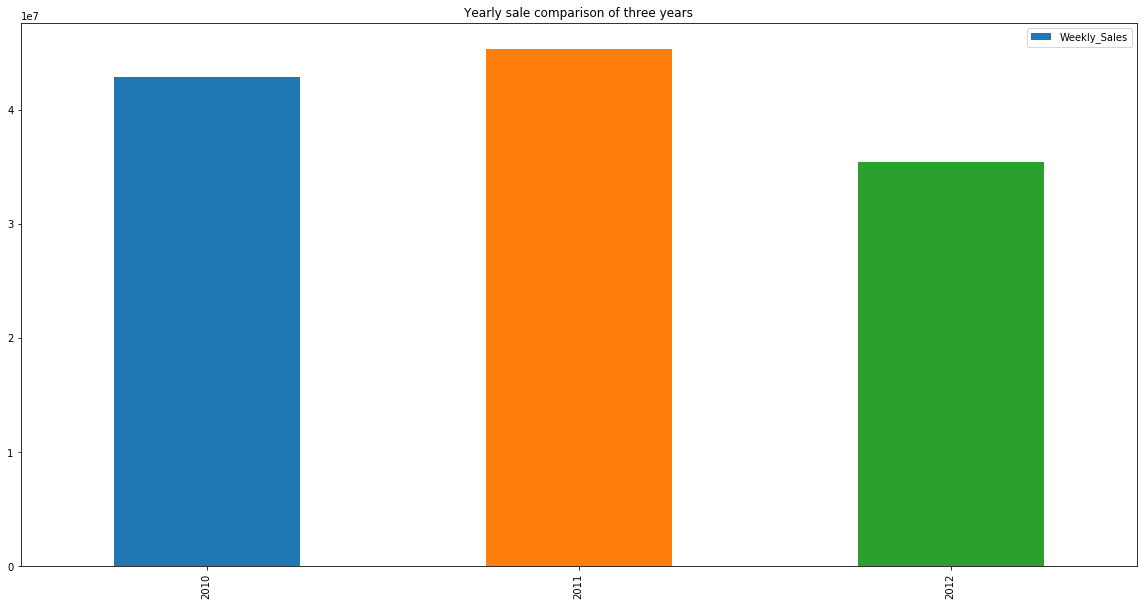

In [21]:
plt.figure(figsize=(20,10))
yearly_sale.plot.bar()      ## label=('2010','2011','2012')
plt.title('Yearly sale comparison of three years')
plt.legend()
plt.show()                               # Yearly Sale Bar Graph

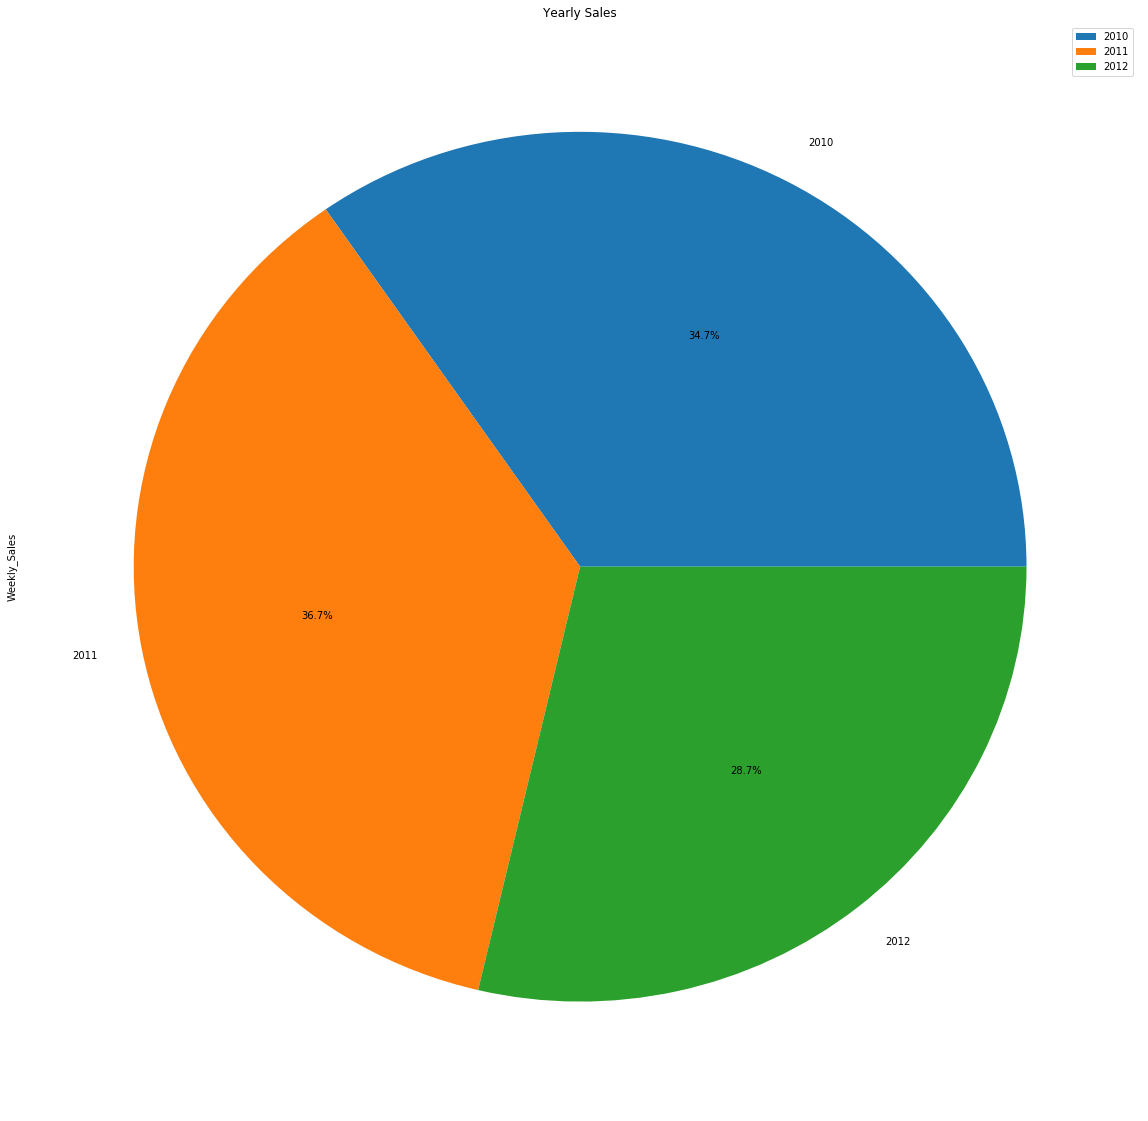

In [22]:
plt.figure(figsize=(20,20))
yearly_sale.plot.pie(autopct='%1.1f%%')
plt.title('Yearly Sales')
plt.legend()
plt.show()                 # Yearly Sales division

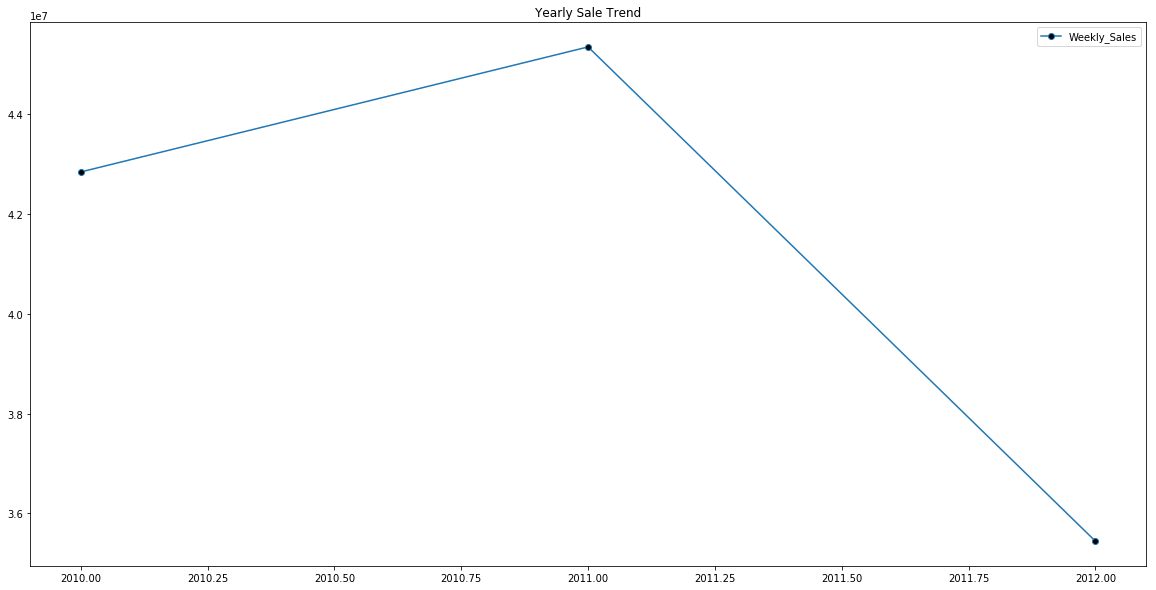

In [23]:
plt.figure(figsize=(20,10))
yearly_sale.plot(style='-', marker='o', markerfacecolor='black')
plt.title('Yearly Sale Trend')
plt.legend()
plt.show()          # Line graph for Yearly Sale Trend

Above is the sale report for all three years. We can see that the sale is maximum in year 2011, whereas the sale is less in year 2012. If we want a brief report for each month, then the below graph will help us understand the total sale of all stores in each month for these three years and the Graph coming after is the one that picturize the Quaterly Sale for three years.

# Yearly Sale Comparison for Store 1

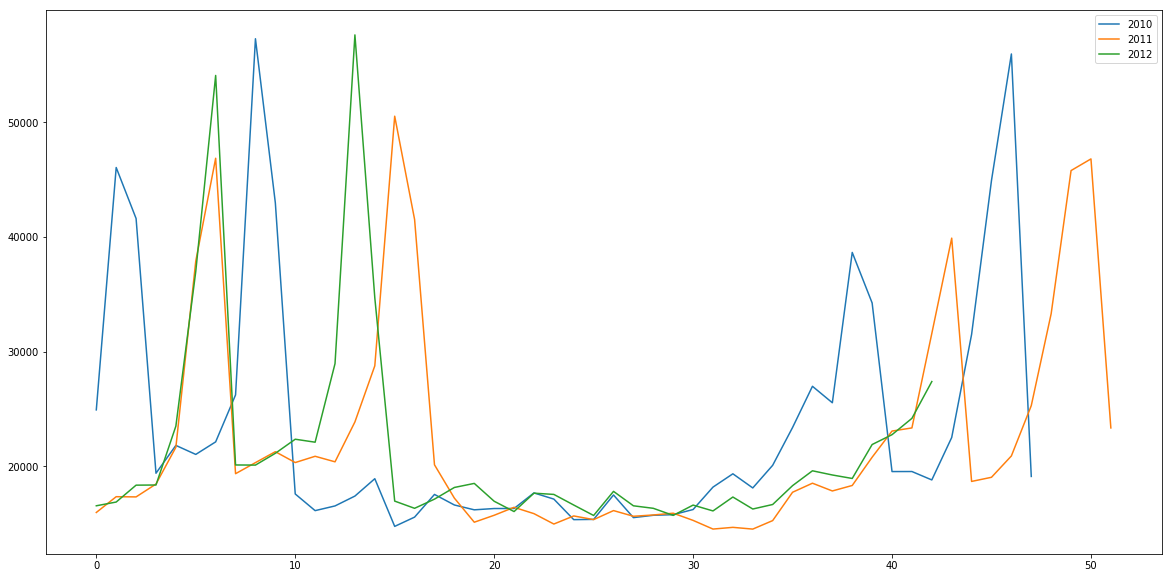

In [24]:
plt.figure(figsize=(20,10))
plt.plot(range(48),store_1_2010['Weekly_Sales'],label='2010')
plt.plot(range(52),store_1_2011['Weekly_Sales'],label='2011')
plt.plot(range(43),store_1_2012['Weekly_Sales'],label='2012')
plt.legend()
plt.show()

# Monthly Sale Report

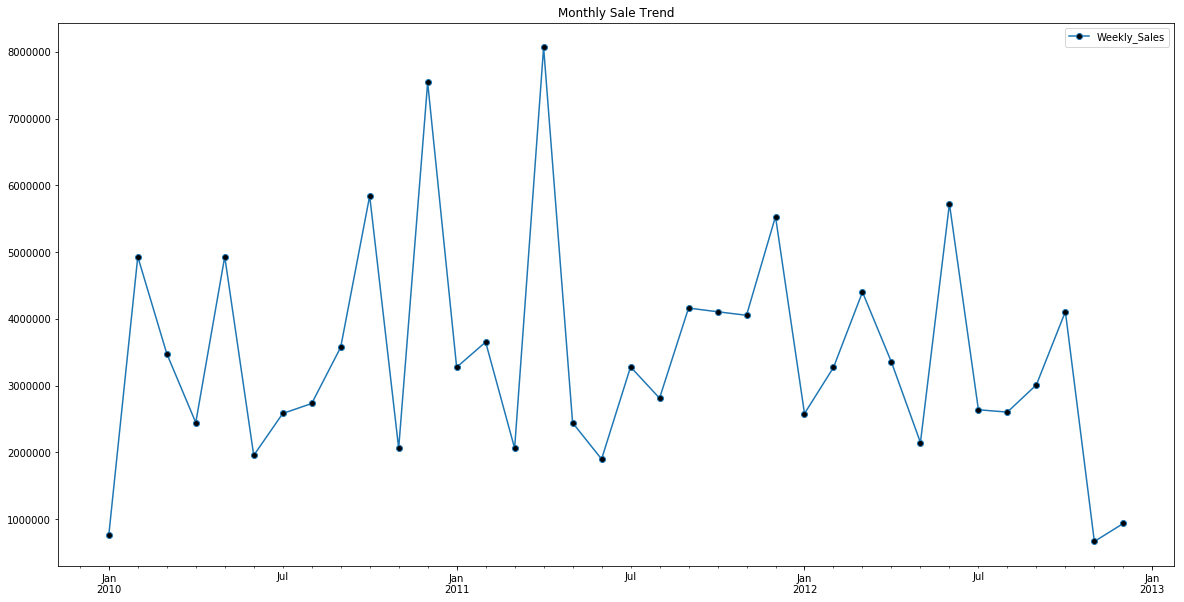

In [25]:
monthly_sale=data.resample('M')['Weekly_Sales'].sum()
plt.figure(figsize=(20,10))
monthly_sale.plot(style='-', marker='o', markerfacecolor='black')
plt.title('Monthly Sale Trend')
plt.legend()
plt.show() 

# Quaterly Sale Report

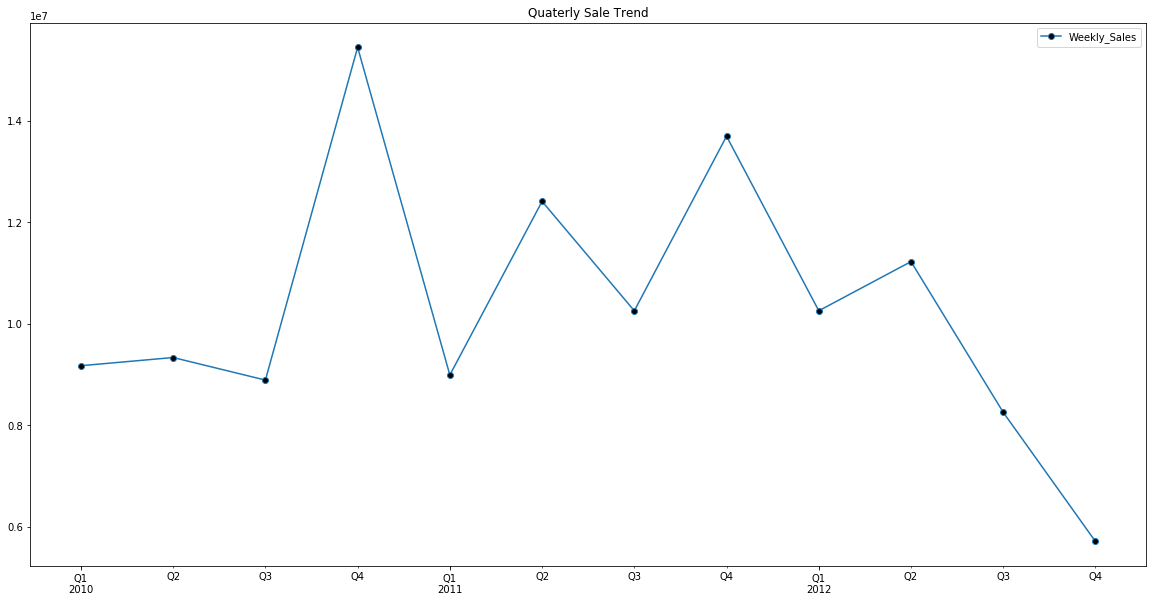

In [26]:
quaterly_sale=data.resample('Q')['Weekly_Sales'].sum()
plt.figure(figsize=(20,10))
quaterly_sale.plot(style='-', marker='o', markerfacecolor='black')
plt.title('Quaterly Sale Trend')
plt.legend()
plt.show() 

## Regional Sales Data

Below we are going to describe the sale in total of five regions

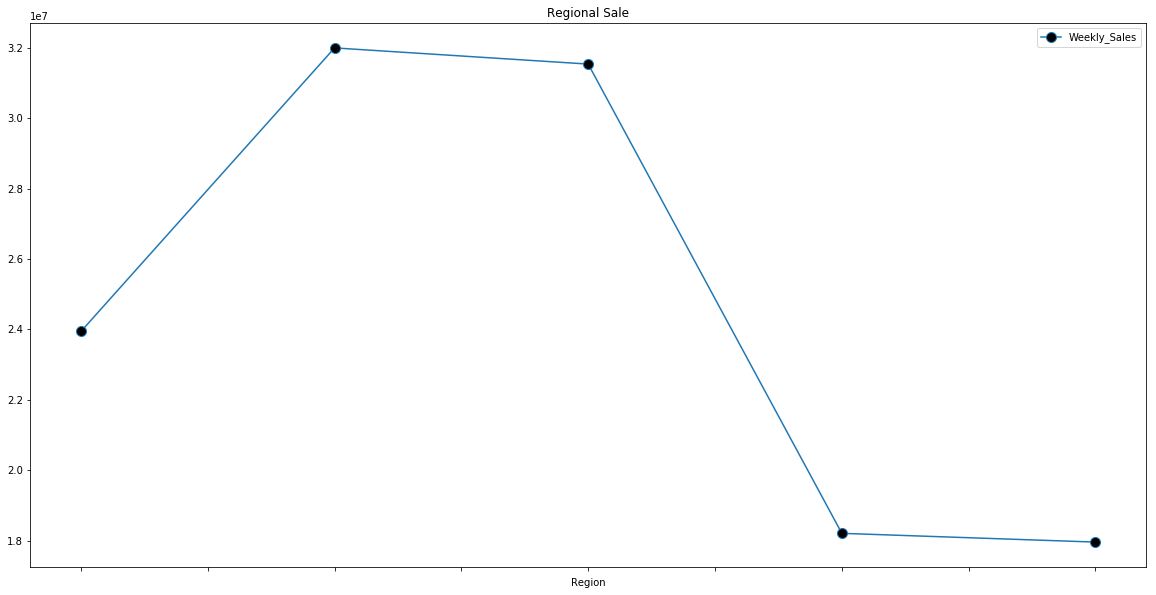

In [27]:
plt.figure(figsize=(20,10))
region_sale.plot(style='-', marker='o', markerfacecolor='black',markersize=10)
plt.title('Regional Sale')
plt.legend()
plt.show()                # Region based Sales Graph

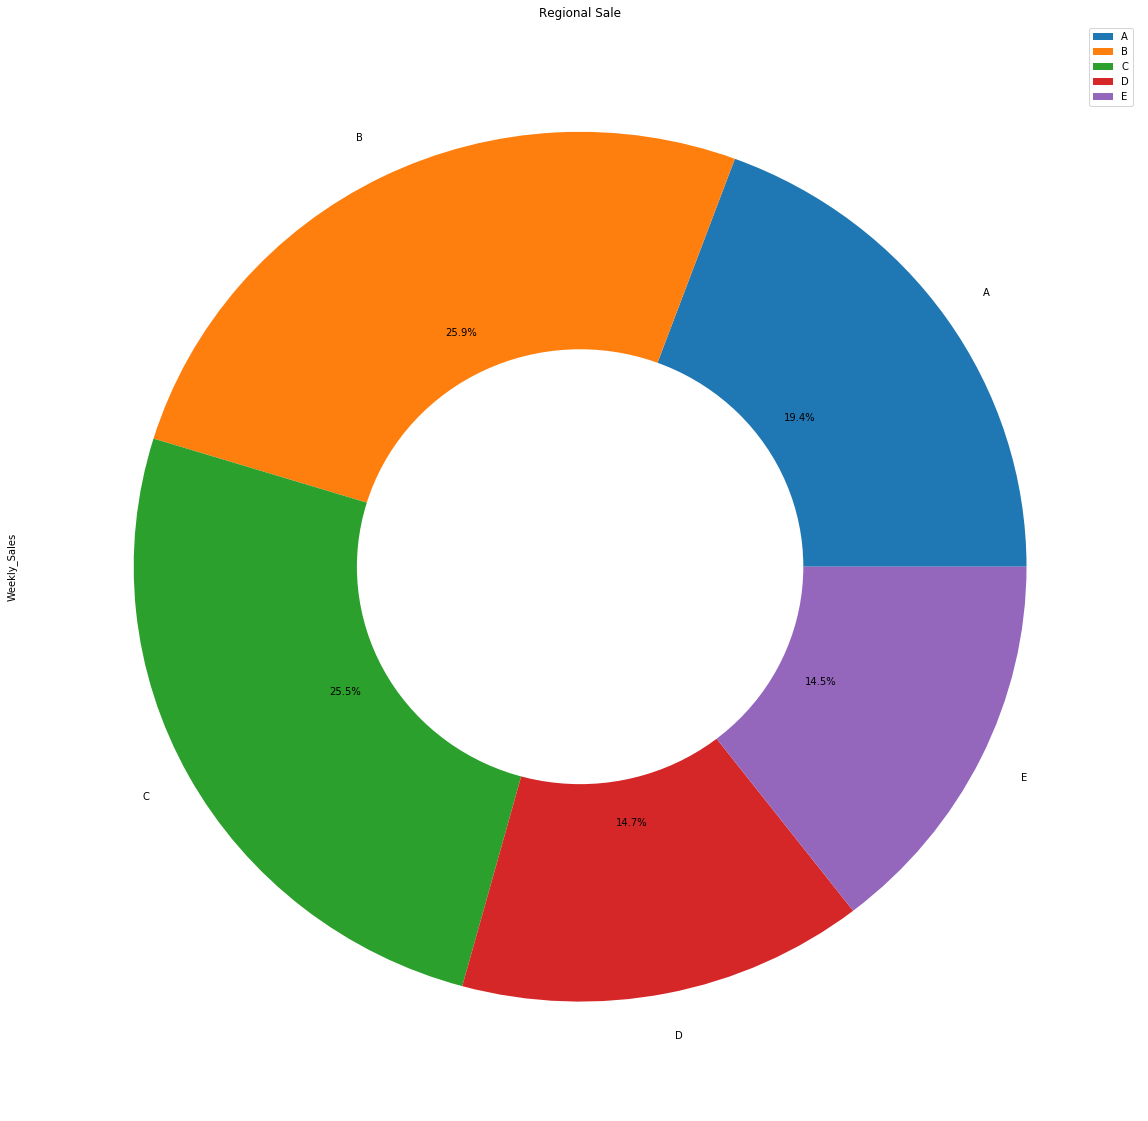

In [28]:
plt.figure(figsize=(20,20))
region_sale.plot.pie(autopct='%1.1f%%')
plt.title('Regional Sale')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend()
plt.show()          # Regional Sale division

From the above two figures, we understand that the Region B is having maximum sale records with percentage of 25.9%, followed by Region C i.e. 25.5%, A 19.4%, D 14.7% and E as 14.5%

### Temperature data for all stores

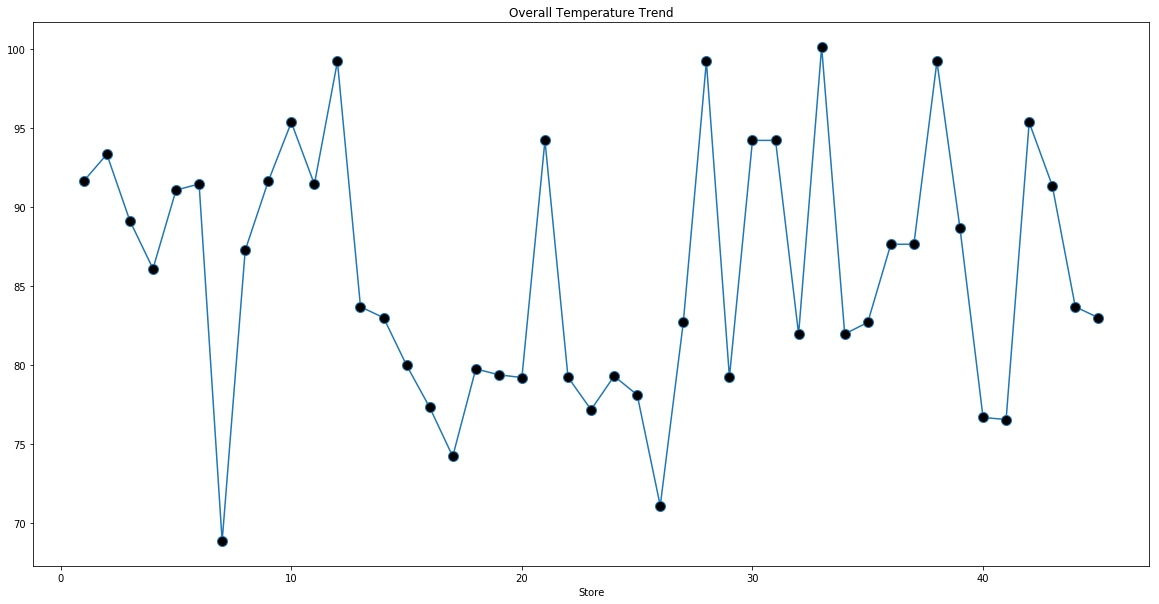

In [29]:
plt.figure(figsize=(20,10))
temperature_detail.plot(style='-', marker='o', markerfacecolor='black',markersize=10)
plt.title('Overall Temperature Trend')
plt.show()        # Temperature Trend among Stores

### Comparison of Temperature data for all stores in three years

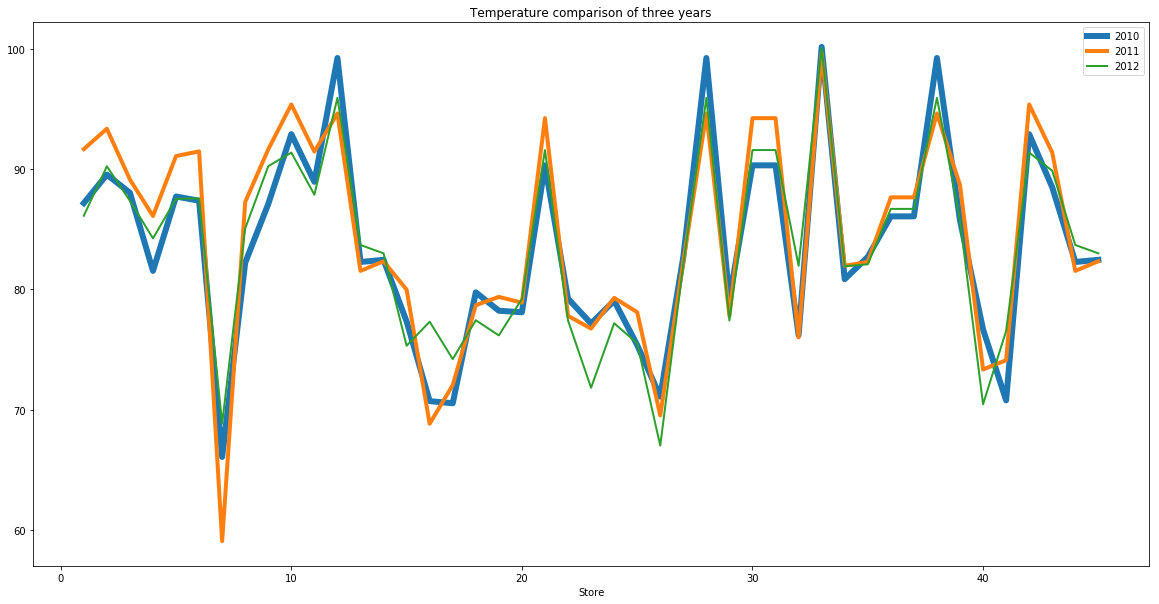

In [30]:
plt.figure(figsize=(20,10))
temp_in_2010.plot(label='2010', linewidth=6)
temp_in_2011.plot(label='2011', linewidth=4)
temp_in_2012.plot(label='2012', linewidth=2)
plt.legend()
plt.title('Temperature comparison of three years')
plt.show()                                # Temperature Trend Among All the stores

Above is the Exploratory Data Analysis, that illustrate the trends of Sales, Temperature and Employment in stores and regions. We can categorize the data based on Time that is on yearly, monthly, quaterly, and weekly basis, but also based on Regions and Stores. Temperature and Unemployment are the factors that are given to us and we need to group the records on the basis of regions to find the best analysis report. Thus we have presented diffreent possibilities as well as cases comparing two or more variables with each other. We have compared the Sales with Temperature and Unemployment individually, but also compared the data after subsetting based on regions. Here is the report that will give us insight to plan for organizational benefits in future.

# Applied Machine Learning models
Below are the Machine Learning models applied to the data using various algorithms, in order to find the best practices for the kind of data we are using in our problem.

## Linear Regression

Here we have applied Linear Regression to our dataset, after dividing our dataset to Training and test set in the ration of 2:1 manually.

In [31]:
linear=linear.LinearRegression()
train=pd.DataFrame();                          # declaration of empty dataset to be used for training of model
train['Temperature']=store_1['Temperature'][:100]
train['Unemployment']=store_1['Unemployment'][:100]
train['Region_number']=store_1['Region_number'][:100]
test=pd.DataFrame();
test['Temperature']=store_1['Temperature'][100:]
test['Unemployment']=store_1['Unemployment'][100:]
test['Region_number']=store_1['Region_number'][100:]
linear.fit(train,store_1['Weekly_Sales'][:100])
linear.score(train,store_1['Weekly_Sales'][:100])
train['Weekly_Sales']=store_1['Weekly_Sales'][:100]
test['test_result']=linear.predict(test)

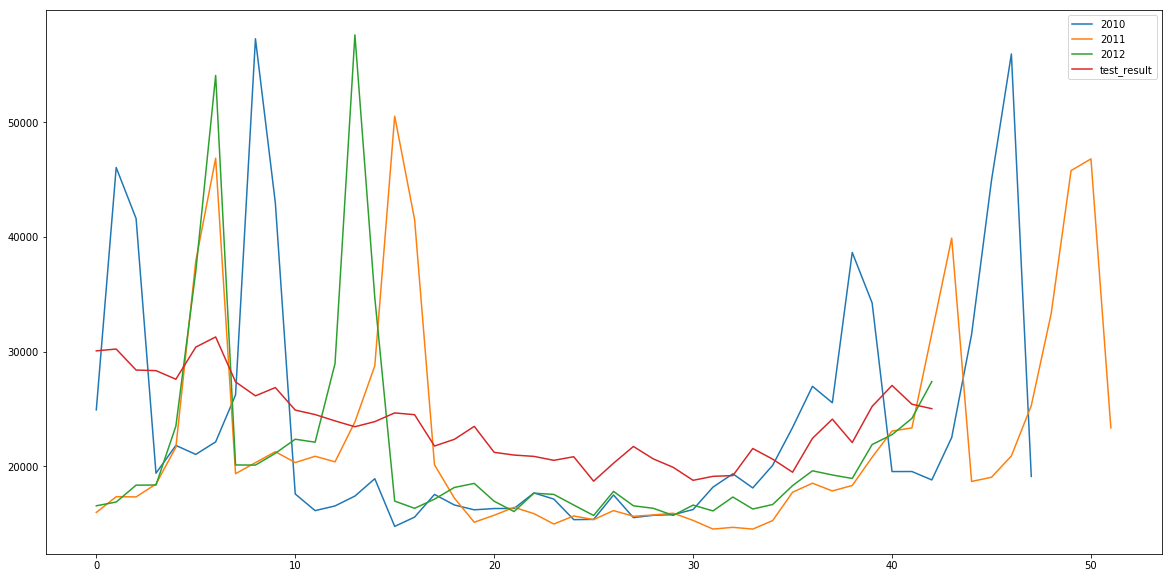

In [32]:
plt.figure(figsize=(20,10))
plt.plot(range(48),store_1_2010['Weekly_Sales'],label='2010')
plt.plot(range(52),store_1_2011['Weekly_Sales'],label='2011')
plt.plot(range(43),store_1_2012['Weekly_Sales'],label='2012')
plt.plot(range(43),test['test_result'])
plt.legend()
plt.show()


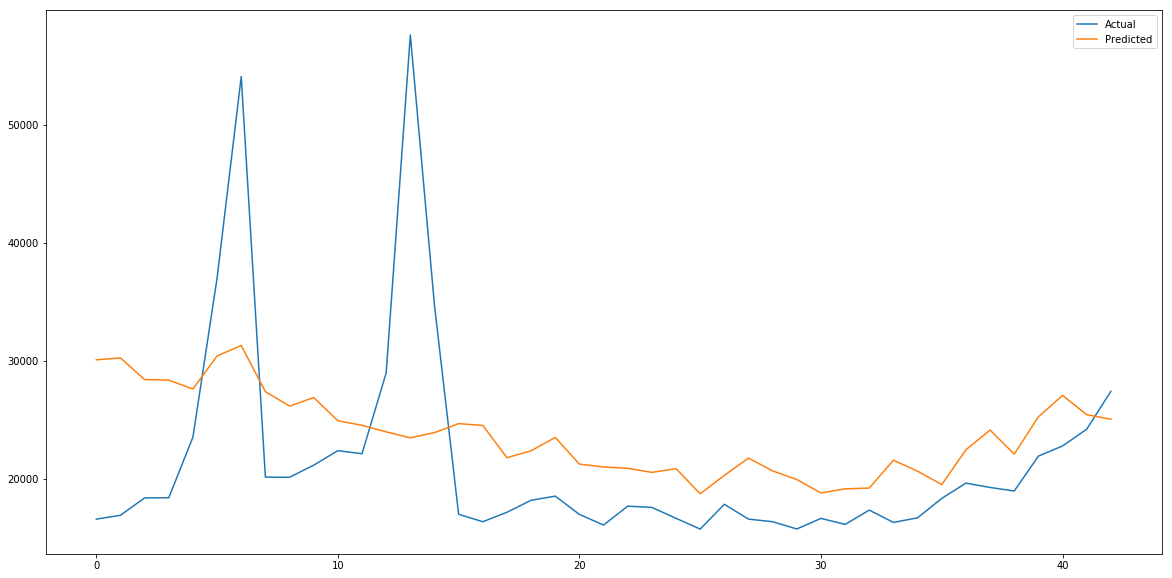

In [33]:
plt.figure(figsize=(20,10))
plt.plot(range(43),store_1_2012['Weekly_Sales'],label='Actual')
plt.plot(range(43),test['test_result'],label='Predicted')
plt.legend()
plt.show()

In [34]:
data.columns

Index(['Store', 'Region', 'Temperature', 'Unemployment', 'Weekly_Sales',
       'Region_number'],
      dtype='object')

## Repeated KFold



In [35]:
X=data[['Store','Temperature','Unemployment','Region_number']].values
Y=data["Weekly_Sales"].values

from sklearn.model_selection import RepeatedKFold
kf=RepeatedKFold(n_splits=2,n_repeats=100)
y_pred=Y.copy()

kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train = Y[train_index]
    linear.fit(X_train,Y_train)
    y_pred[test_index]=linear.predict(X_test)
a=(abs(y_pred-Y))
print(a.min())
print(a.max())
print(a.mean())
print(a.var())
print(linear.score(X_train,Y_train))

0.26283902405521076
142779.62540115434
8872.372023156751
111580400.17395373
0.16177319400865353


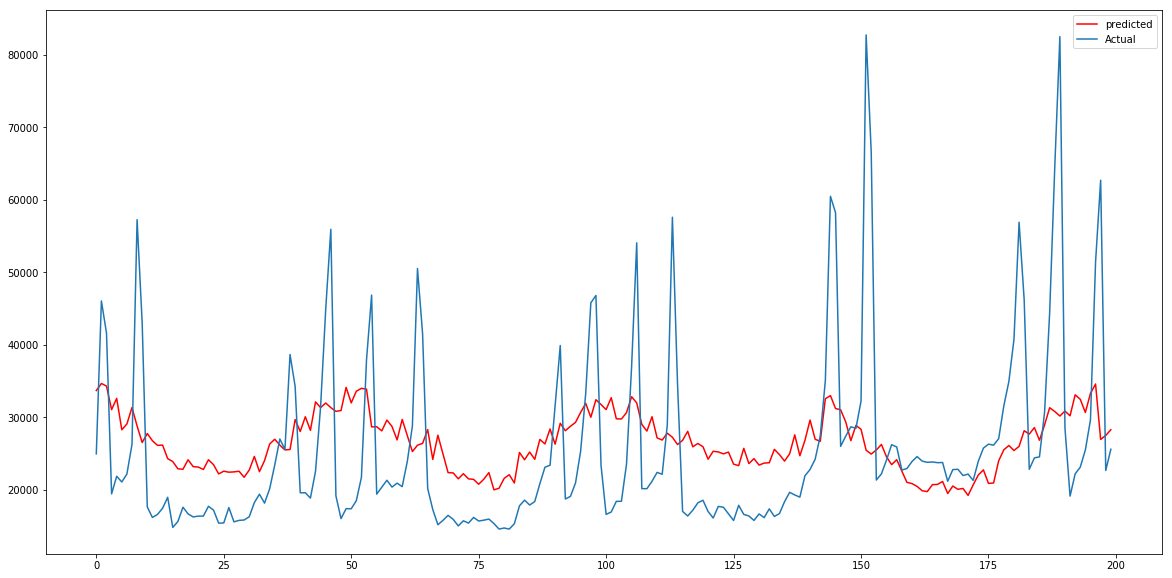

In [36]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.plot(Y[:200], label='Actual')
plt.legend()
plt.show()

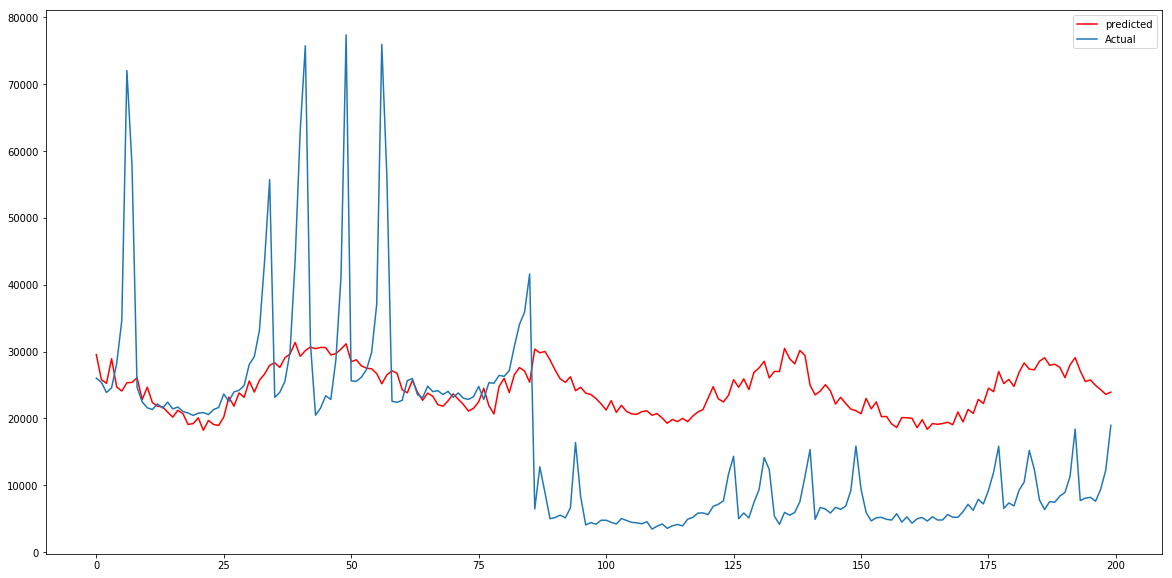

In [37]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[200:400],color='r', label='predicted')
plt.plot(Y[200:400], label='Actual')
plt.legend()
plt.show()

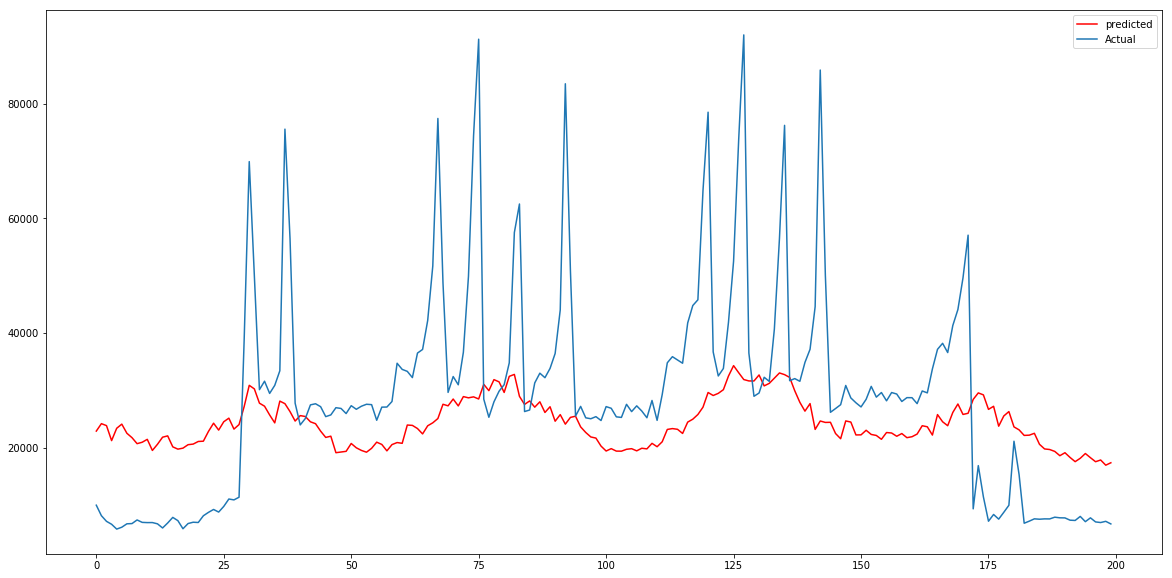

In [38]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[400:600],color='r', label='predicted')
plt.plot(Y[400:600], label='Actual')
plt.legend()
plt.show()

## KFold

In [39]:
X=data[['Store','Temperature','Unemployment','Region_number']].values
Y=data["Weekly_Sales"].values

from sklearn.model_selection import KFold
kf=KFold(n_splits=2000,shuffle=True)
y_pred=Y.copy()

kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train = Y[train_index]
    linear.fit(X_train,Y_train)
    y_pred[test_index]=linear.predict(X_test)
a=(abs(y_pred-Y))
print(a.min())
print(a.max())
print(a.mean())
print(a.var())
print(linear.score(X_train,Y_train))

2.4287652031107427
143315.5003098175
8866.430194990598
111618001.48037766
0.1670144034317088


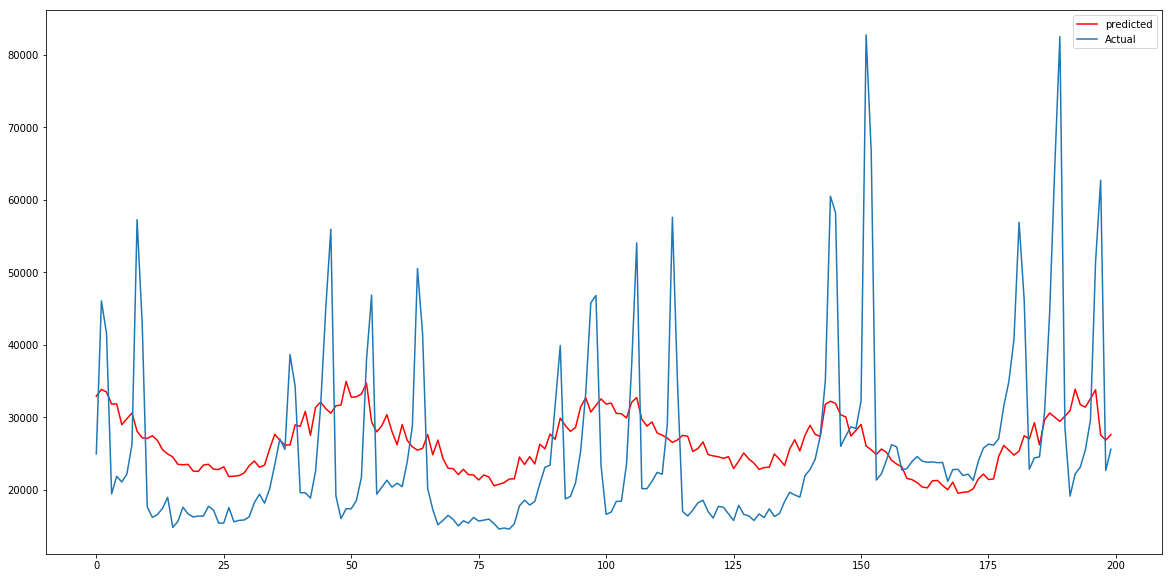

In [40]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.plot(Y[:200], label='Actual')
plt.legend()
plt.show()

## Leave One Out



In [41]:
X=data[['Store','Temperature','Unemployment','Region_number']].values
Y=data["Weekly_Sales"].values

from sklearn.model_selection import LeaveOneOut
kf=LeaveOneOut()
y_pred=Y.copy()

kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train = Y[train_index]
    linear.fit(X_train,Y_train)
    y_pred[test_index]=linear.predict(X_test)
a=(abs(y_pred-Y))
print(a.min())
print(a.max())
print(a.mean())
print(a.var())
print(linear.score(X_train,Y_train))

1.775503907325401
143315.22795966407
8866.410969007758
111613625.75891009
0.1671854303099839


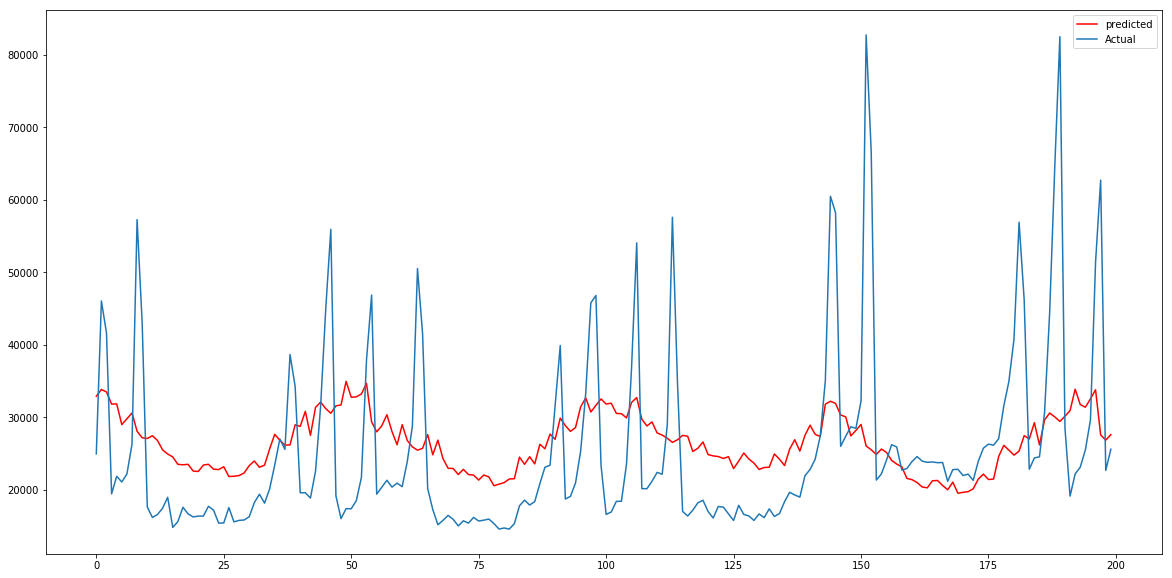

In [42]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.plot(Y[:200], label='Actual')
plt.legend()
plt.show()

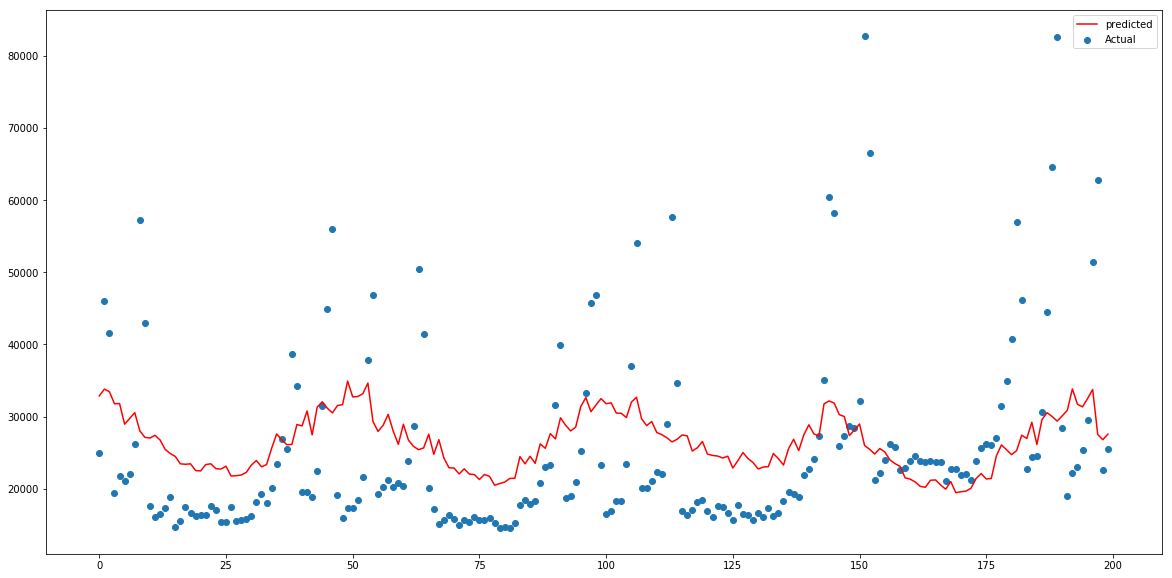

In [43]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.scatter(range(200),Y[:200],marker='o', label='Actual')
plt.legend()
plt.show()

## Time Series Analysis

Time Series Split is one of the model available in model-selection module of Scikit-learn library. This is particularly used for the data divided on the basis of Date and Time.

In [44]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

X=data[['Store','Temperature','Unemployment','Region_number']].values
Y=data["Weekly_Sales"].values

kf=TimeSeriesSplit(n_splits=len(X)-1)
y_pred=Y.copy()

kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train = Y[train_index]
    linear.fit(X_train,Y_train)
    y_pred[test_index]=linear.predict(X_test)
a=(abs(y_pred-Y))
print(a.min(),',',y_pred.min())
print(a.max(),',',y_pred.max())
print(a.mean(),',',y_pred.mean())
print(a.var(),',',y_pred.var())
print(linear.score(X_train,Y_train))
print(metrics.mean_absolute_error(Y, y_pred))
print(metrics.mean_squared_error(Y, y_pred))
print(np.sqrt(metrics.mean_squared_error(Y, y_pred)))

0.0 , -15539.705744955601
135594.35141364217 , 55261.60722660599
9470.737758226218 , 21289.87540288991
102931037.15354863 , 87852143.7883485
0.1671854303099839
9470.737758226218
192625910.83864042
13878.973695437297


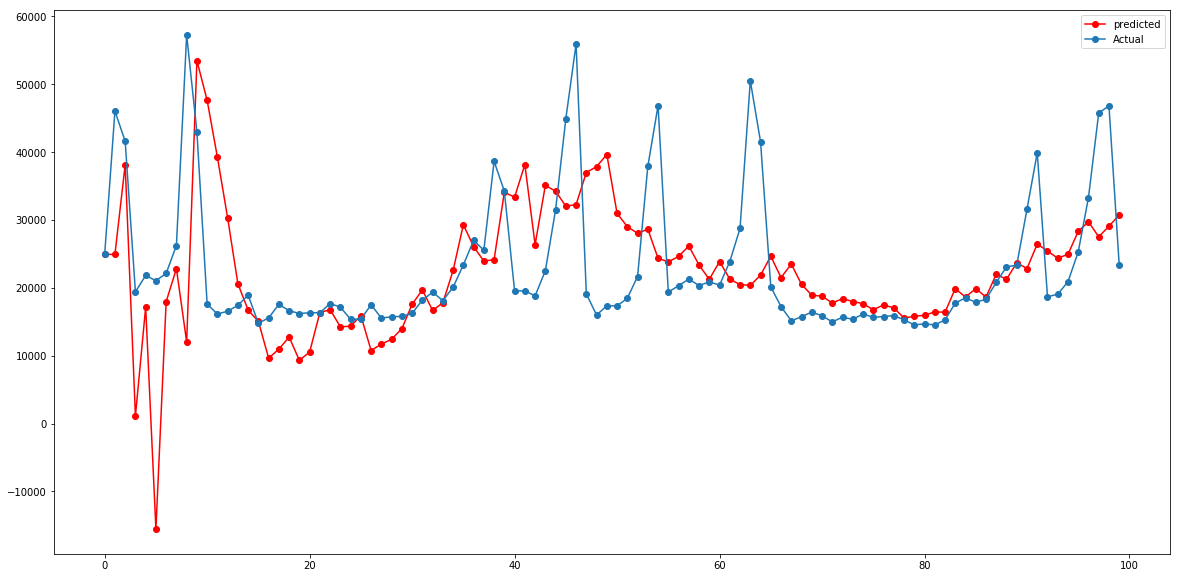

In [45]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:100],color='r', marker='o', label='predicted')
plt.plot(range(100),Y[:100],marker='o', label='Actual')
plt.legend()
plt.show()

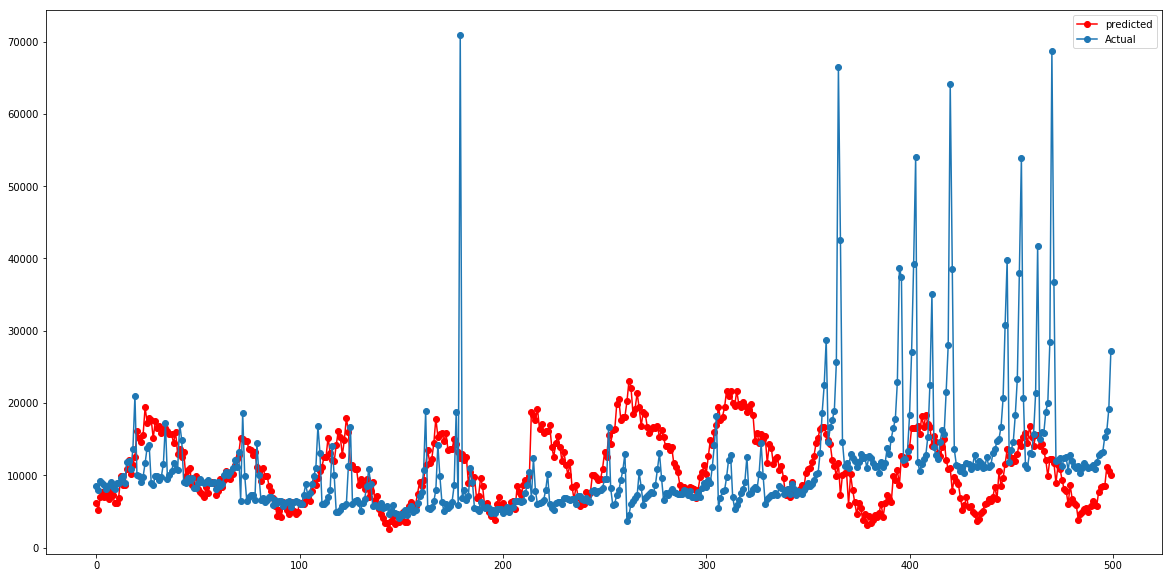

In [46]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[-500:],color='r', marker='o', label='predicted')
plt.plot(Y[-500:],marker='o', label='Actual')
plt.legend()
plt.show()

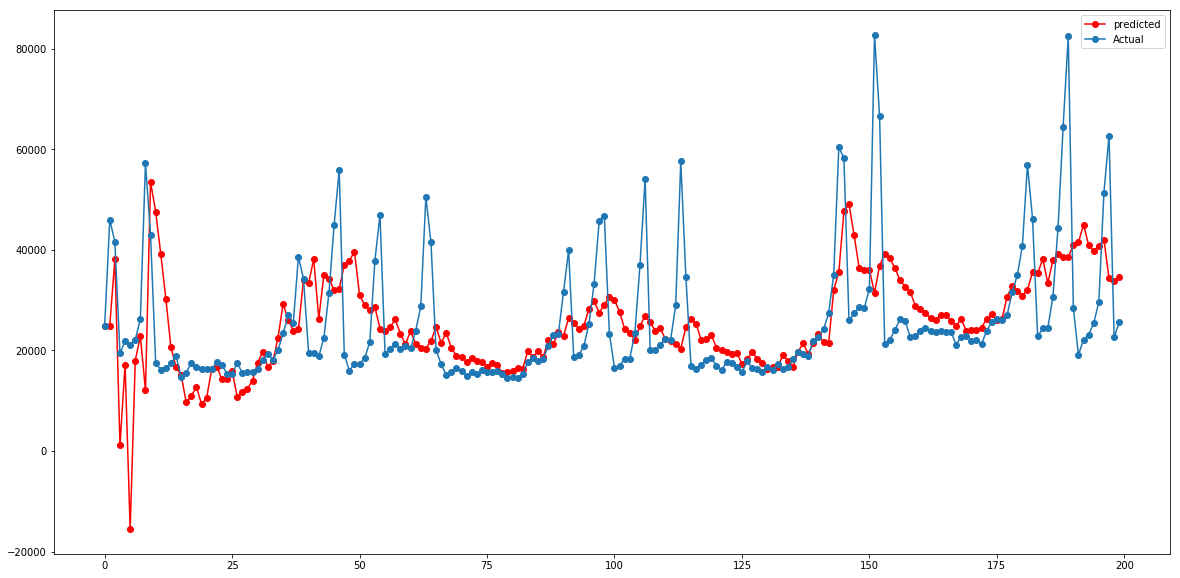

In [47]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r',marker='o', label='predicted')
plt.plot(Y[:200],marker='o', label='Actual')
plt.legend()
plt.show()

In [48]:
linear.coef_

array([-1447.90681341,  -252.82444304,  -803.98664627, 11368.86870286])

In [49]:
linear.intercept_

40174.575835085314

From the above used Machine Learning Techniques, we can conclude that the Time Series Split approach is best fit Machine Learning model for this problem and gives us minimum deviation in predicted and actual data.